# Data Science Project

* Name: Robert Cauvy
* Email: rcauvy@gmail.com


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# Business Problem

As the Covid-19 virus has spread throughout the world. Countries across the world are working to innoculate their populations and protect against future outbreaks it is essential to know which populations are at risk of not receiving the vaccines. This information would help public health organizations optimally target their resources to informing and educating individuals about the immunizations.

# OBTAIN

In [94]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Data Source
# https://www.drivendata.org/competitions/66/flu-shot-learning/data/

In [63]:
features_df = pd.read_csv('data/training_set_features.csv',index_col=0)
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


### Data Glossary

**h1n1_concern** - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

**h1n1_knowledge** - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

**behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

**behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

**behavioral_face_mask** - Has bought a face mask. (binary)

**behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

**behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

**behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

**behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

**doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

**doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

**chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

**child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

**health_worker** - Is a healthcare worker. (binary)

**health_insurance** - Has health insurance. (binary)

**opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

**opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

**opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

**opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

**opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

**age_group** - Age group of respondent.

**education** - Self-reported education level.

**race** - Race of respondent.

**sex** - Sex of respondent.

**income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

**marital_status** - Marital status of respondent.

**rent_or_own** - Housing situation of respondent.

**employment_status** - Employment status of respondent.

**hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

**census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

**household_adults** - Number of other adults in household, top-coded to 3.

**household_children** - Number of children in household, top-coded to 3.

**employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.

**employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [198]:
features_df.mean()

h1n1_concern                   1.618486
h1n1_knowledge                 1.262532
behavioral_antiviral_meds      0.048844
behavioral_avoidance           0.725612
behavioral_face_mask           0.068982
behavioral_wash_hands          0.825614
behavioral_large_gatherings    0.358640
behavioral_outside_home        0.337315
behavioral_touch_face          0.677264
doctor_recc_h1n1               0.220312
doctor_recc_seasonal           0.329735
chronic_med_condition          0.283261
child_under_6_months           0.082590
health_worker                  0.111918
health_insurance               0.879720
opinion_h1n1_vacc_effective    3.850623
opinion_h1n1_risk              2.342566
opinion_h1n1_sick_from_vacc    2.357670
opinion_seas_vacc_effective    4.025986
opinion_seas_risk              2.719162
opinion_seas_sick_from_vacc    2.118112
household_adults               0.886499
household_children             0.534583
dtype: float64

In [199]:
features_df2 = features_df.fillna(features_df.mean())

In [201]:
features_df2.isna().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [203]:
features_df2.fillna(value='Unknown',inplace=True)
features_df2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.00000,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.00000,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.220312,0.329735,1.0,0.0,0.0,0.87972,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.87972,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.87972,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.87972,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,Unknown,Unknown
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,1.0,1.00000,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.87972,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,Unknown,Not Married,Own,Unknown,lzgpxyit,"MSA, Not Principle City",0.0,0.0,Unknown,Unknown


In [64]:
labels_df = pd.read_csv('data/training_set_labels.csv',index_col=0)
labels_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [18]:
for col in list(labels_df.columns):
    print(labels_df[col].value_counts())

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


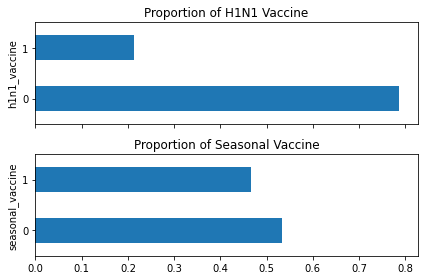

In [65]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

It looks like roughy half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 flu vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

# SCRUB

In [66]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [68]:
# Let's double-check that the rows between the features and the labels match up. 
# We don't want to have the wrong labels. 
# Numpy's assert_array_equal will error if the two arrays—the row indices of 
# the two data frames—don't match up.
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

The assertion ran, and nothing happened. That's good, it means there is no problem.

# EXPLORE

In [69]:
# Joining Features and Labels Dataframes
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [71]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


In [72]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [73]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


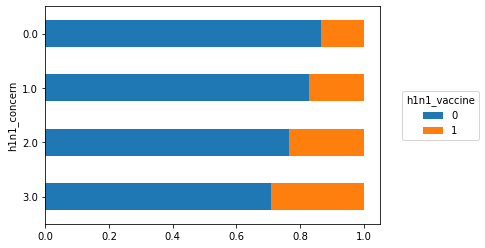

In [74]:

ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [75]:
# Let's factor this code into a function so we can use it on more variables.
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

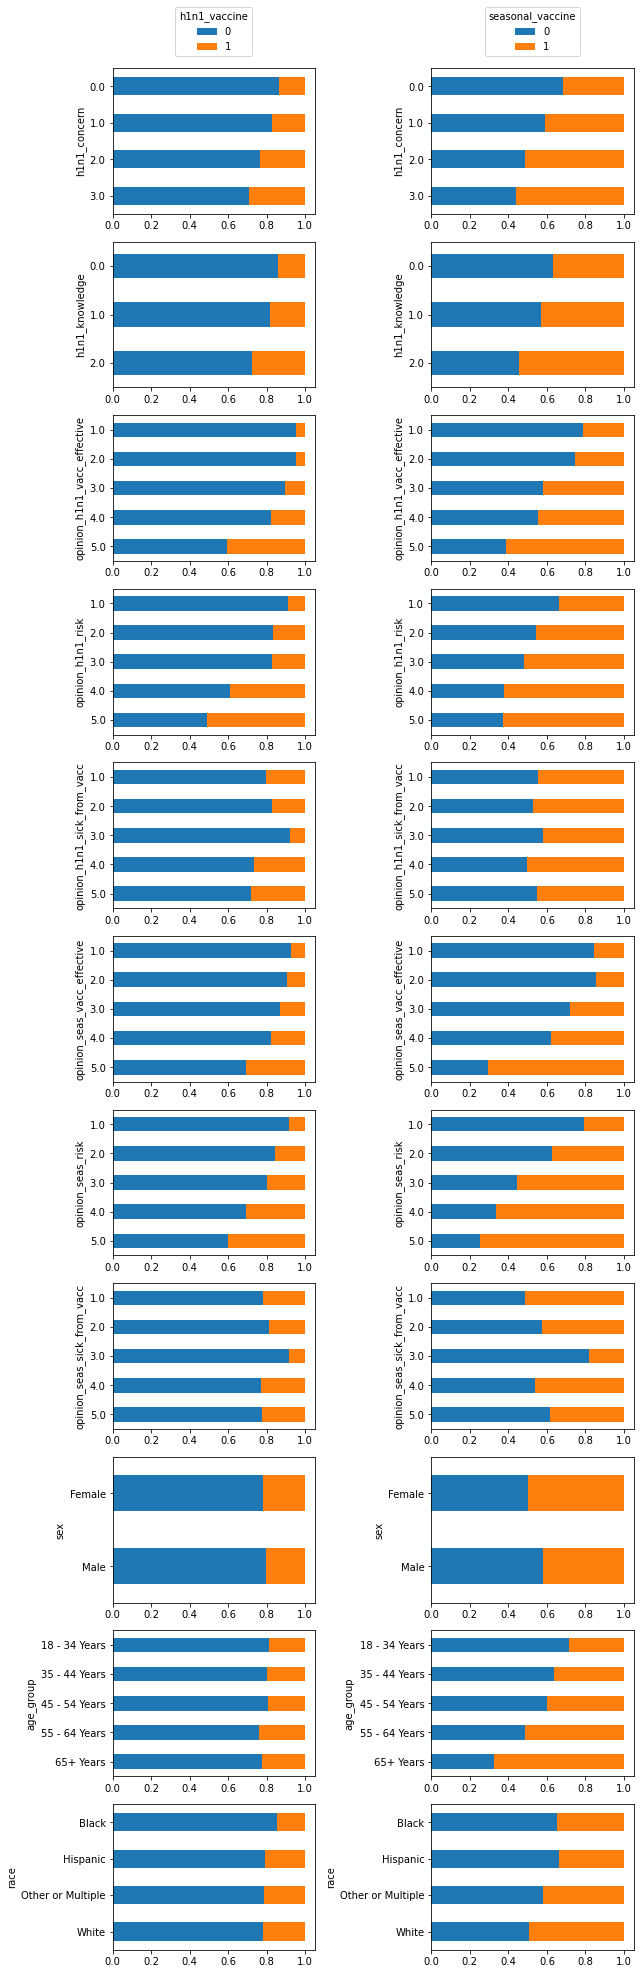

In [76]:
# Then, we'll loop through several columns and plot against both h1n1_vaccine and seasonal_vaccine.
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

It looks like the knowledge and opinion questions have pretty strong signal for both target variables.

# MODEL

In [36]:
# We will be using logistic regression, a simple and fast linear model for classification problems. 
# Logistic regression is a great model choice for a first-pass baseline 
# model when starting out on a problem.

In [56]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [57]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('SS', StandardScaler()),
    ('SI', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(transformers = [
    ("numeric",numeric_preprocessing_steps, numeric_cols)],remainder = "drop"
)

In [58]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [59]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [78]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=42
)

In [79]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 212 ms, sys: 28.2 ms, total: 240 ms
Wall time: 175 ms


[array([[0.9370031 , 0.0629969 ],
        [0.24217469, 0.75782531],
        [0.95826257, 0.04173743],
        ...,
        [0.18671901, 0.81328099],
        [0.9839001 , 0.0160999 ],
        [0.74724923, 0.25275077]]),
 array([[0.98139237, 0.01860763],
        [0.09231535, 0.90768465],
        [0.95327723, 0.04672277],
        ...,
        [0.09706328, 0.90293672],
        [0.58177139, 0.41822861],
        [0.56670581, 0.43329419]])]

In [80]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.062997,0.018608
12566,0.757825,0.907685
13996,0.041737,0.046723
12769,0.225619,0.971052
16915,0.074570,0.249598


In [81]:
roc_auc_score(y_eval, y_preds)

0.8317490240860408

### Feature Preprocessing

There are two important data preprocessing steps before jumping to the logistic regression:

Scaling: Transform all features to be on the same scale. This matters when using regularization, which we will discuss in the next section. We will use StandardScaler, also known as Z-score scaling. This scales and shifts features so that they have zero mean and unit variance.
NA Imputation: Logistic regression does not handle NA values. We will use median imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

## Encoding Categorical Features

In [205]:
X_train, X_test, y_train, y_test = train_test_split(features_df2, labels_df, random_state=42)

In [150]:
le = LabelEncoder()

In [151]:
le.fit(X_train['sex'])

LabelEncoder()

In [152]:
X_train['marital_status'] = X_train['marital_status'].fillna('Missing')

In [153]:
le.fit(X_train['marital_status'])

LabelEncoder()

In [155]:
X_train['sex'] = le.fit_transform(X_train['sex'])

In [156]:
X_train['marital_status'] = le.fit_transform(X_train['marital_status'])

In [165]:
X_train['income_poverty'] = X_train['income_poverty'].fillna('Missing')

In [166]:
X_train['education'] = X_train['education'].fillna('Missing')

In [163]:
X_train['age_group'] = le.fit_transform(X_train['age_group'])

In [167]:
X_train['education'] = le.fit_transform(X_train['education'])

In [168]:
X_train['income_poverty'] = le.fit_transform(X_train['income_poverty'])

In [170]:
cat_cols

['race',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [178]:
X_train['employment_occupation'].isna().sum()

10074

In [173]:
X_train['employment_status'] = X_train['employment_status'].fillna('Missing')

In [177]:
X_train['employment_industry'] = X_train['employment_industry'].fillna('Missing')

In [179]:
X_train['employment_occupation'] = X_train['employment_occupation'].fillna('Missing')

In [184]:
X_train['race'] = le.fit_transform(X_train['race'])

In [184]:
X_train['race'] = le.fit_transform(X_train['race'])

In [186]:
X_train['employment_status'] = le.fit_transform(X_train['employment_status'])

In [187]:
X_train['hhs_geo_region'] = le.fit_transform(X_train['hhs_geo_region'])

In [188]:
X_train['census_msa'] = le.fit_transform(X_train['census_msa'])

In [189]:
X_train['employment_industry'] = le.fit_transform(X_train['employment_industry'])

In [190]:
X_train['employment_occupation'] = le.fit_transform(X_train['employment_occupation'])

In [204]:
features_df2.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [107]:
from collections import defaultdict

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, 
    labels_df,
    test_size = .3,
    random_state=42)

X_train.shape, X_test.shape

((18694, 35), (8013, 35))

In [206]:
d = defaultdict(LabelEncoder)

In [207]:
# Encoding the variable
train_transformed = X_train.apply(lambda x: d[x.name].fit_transform(x))

#  Using the dictionary to encode future data
test_transformed = X_test.apply(lambda x: d[x.name].transform(x))

In [210]:
train_transformed

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25194,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,4,1,1,3,1,1,0,0,3,0,3,1,0,1,8,2,2,2,0,0
14006,3,1,0,2,0,2,0,0,0,0,2,2,2,0,2,2,1,0,3,5,4,2,3,3,0,3,0,2,0,6,0,3,2,5,12
11285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,3,1,0,2,2,3,0,0,1,0,0,4,1,0,2,18,8
2900,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,4,0,0,3,4,1,3,2,3,1,2,1,0,0,7,0,0,0,8,17
19083,3,1,2,2,0,2,2,2,2,2,2,1,1,1,1,5,0,1,0,1,4,0,4,3,0,3,2,2,3,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,3,1,0,0,0,2,0,0,2,0,0,0,0,0,2,4,1,1,3,1,0,3,3,3,1,1,1,0,1,9,1,0,0,0,0
5390,1,1,0,0,0,2,0,0,2,1,1,0,0,0,1,4,1,0,3,1,4,3,3,3,1,0,1,0,2,7,1,0,0,0,0
860,3,1,0,2,0,0,0,0,2,0,0,0,0,0,1,4,1,1,3,1,1,3,0,3,0,0,0,0,0,9,2,2,0,2,21


In [42]:
cat_cols = ['race','employment_status','hhs_geo_region', 'census_msa',
            'employment_industry','employment_occupation']

In [53]:
ohe_df = ohe.fit_transform(features_df[cat_cols]).toarray

ValueError: Input contains NaN

In [38]:
binary_cols = ['sex','marital_status']

In [37]:
ord_cols = ['age_group','education','income_poverty']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df,
    test_size=0.25, random_state=42)

### NA Imputation

Logistic regression does not handle NA values. We will use *median* imputation, which fills missing values with the median from the training data, implemented with SimpleImputer.

## Pipeline

In [44]:
numeric_preprocessing = Pipeline([('ss', StandardScaler()),
                                  ('si', SimpleImputer(strategy='median'))])

In [45]:
preprocessor = ColumnTransformer(transformers = [
    ("numeric", numeric_preprocessing, numeric_cols)])

In [ ]:
ohe_df1 = features_df.

## Estimator

In [46]:
# Ridge(L2) Regularization
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [ ]:
LogisticRegression()

### Hyperparameter Tuning

In [47]:
# GridsearchCV

## Initial Model

In [42]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

NameError: name 'full_pipeline' is not defined

## Random Forest 

## XGBoost

# iNTERPRET

In [82]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
print(classification_report(y_test, test_preds))

NameError: name 'model' is not defined

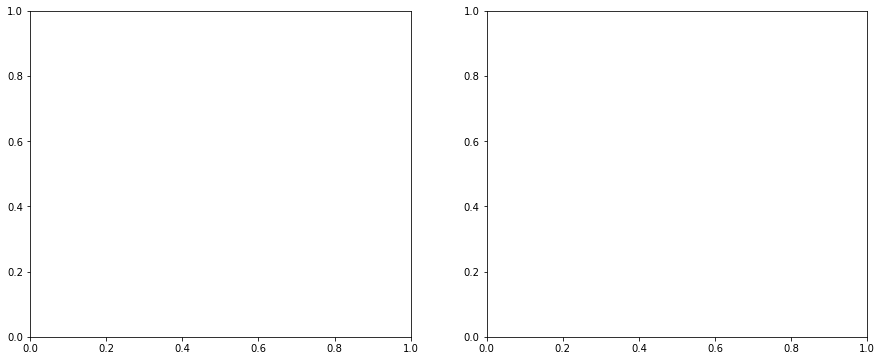

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    
plot_confusion_matrix(model, X_train, y_train, ax=ax[0])
plot_confusion_matrix(model, X_test, y_test, ax=ax[1])
ax[0].grid(False)
ax[1].grid(False)

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.

# TO DO/FUTURE WORK

- 